###This code shows convergence behaviour for a c value that we created using theoretical c formula given in paper. This code is still in progress as I am trying to understand the impact of the changes made

In [1]:
# =================== Imports ===================
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# =================== Channel Gain Setup ===================
c = 3*10**8                                      # speed of light
h_BS = 3.5                                       # antenna height of the base station [m]
h_UT = 3.5                                       # antenna height of the user terminal [m]
h_E = 1                                          # effective environment height [m]
h_prime_BS = h_BS - h_E                          # effective antenna height of the base station [m]
h_prime_UT = h_UT - h_E                          # effective antenna height of the user terminal [m]

def get_distance2D(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def get_distance3D(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 + (p1[2] - p2[2]) ** 2)

def get_PL_LOS(p1, p2, f_c):
    d_2D = get_distance2D(p1, p2)
    d_3D = get_distance3D(p1, p2)
    d_BP = (4 * h_prime_BS * h_prime_UT * f_c) / c
    if d_2D < 10:
        if (1 <= d_3D <= 150):
            return 32.4 + 17.3*np.log10(d_3D) + 20*np.log10(f_c * 1e-9)
    else:
        if (10 <= d_2D <= d_BP):
            return 32.4 + 21*np.log10(d_3D) + 20*np.log10(f_c * 1e-9)
        elif (d_BP <= d_2D <= 5e3):
            return 32.4 + 40*np.log10(d_3D) + 20*np.log10(f_c * 1e-9) - 9.5*np.log10(d_BP**2 + (p1[2]-p2[2])**2)
    return 0

def get_PL_NLOS(p1, p2, f_c):
    d_2D = get_distance2D(p1, p2)
    d_3D = get_distance3D(p1, p2)
    if d_2D < 10:
        if (1 <= d_3D <= 150):
            PLp = 17.3 + 38.3*np.log10(d_3D) + 24.9*np.log10(f_c * 1e-9)
        else:
            PLp = 0
    else:
        if (10 <= d_2D <= 5e3):
            PLp = 22.4 + 35.3*np.log10(d_3D) + 21.3*np.log10(f_c * 1e-9) - 0.3*(p2[2] - 1.5)
        else:
            PLp = 0
    return max(get_PL_LOS(p1, p2, f_c), PLp)

def get_Pr(p1, p2):
    d_2D = get_distance2D(p1, p2)
    if d_2D < 10:
        if d_2D <= 1.2:
            return 1
        elif d_2D < 6.5:
            return math.exp(-(d_2D - 1.2)/4.7)
        else:
            return math.exp(-(d_2D - 6.5)/32.6) * 0.32
    else:
        if d_2D <= 18:
            return 1
        else:
            return (18/d_2D) + (math.exp(-d_2D/36) * (1 - (18/d_2D)))

def get_PL(p1, p2, f_c):
    return get_Pr(p1, p2)*get_PL_LOS(p1, p2, f_c) + (1-get_Pr(p1, p2))*get_PL_NLOS(p1, p2, f_c)

def get_channel_gain(p1, p2, f_c):
    return 1 / 10**(get_PL(p1, p2, f_c) / 10)



Channel gain values are: [9.37136965e-07 4.05027904e-07 2.05073317e-07 9.63273364e-08
 5.08245439e-08]
Initial Power values are: [0.21166286 0.48685753 0.91094882 0.48580603 0.82379842]
Starting c_max: 658645904815.724

=== Testing c_max = 6.586e+11 ===
0
1
2
✅ Found feasible c_max = 6.586e+11, converged in 3 iterations.
   Node  Final Power P*  Final Utility  Channel Gain h
0     1        0.253654   2.927432e-13    9.371370e-07
1     2        1.000000   2.862058e-13    4.050279e-07
2     3        1.000000   1.978200e-13    2.050733e-07
3     4        1.000000   1.064363e-13    9.632734e-08
4     5        1.000000   5.914227e-14    5.082454e-08


/tmp/ipython-input-4193558292.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum1 = np.sum(h[j] * sqrtP[j] for j in range(len(P)) if i != j)
/tmp/ipython-input-4193558292.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum2 = np.sum(h2[j] * P[j] for j in range(len(P)) if i != j) + 1e-12


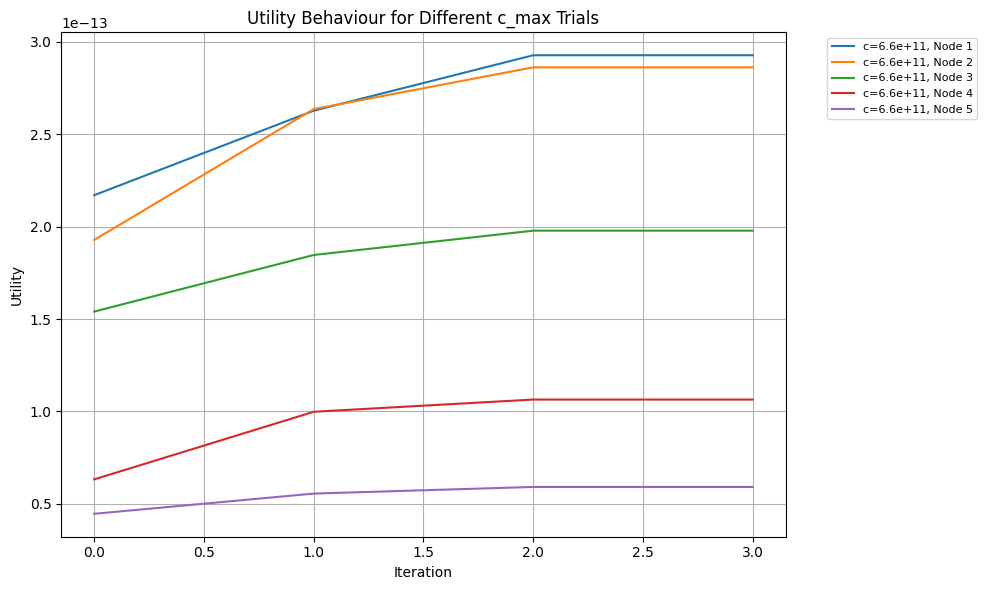

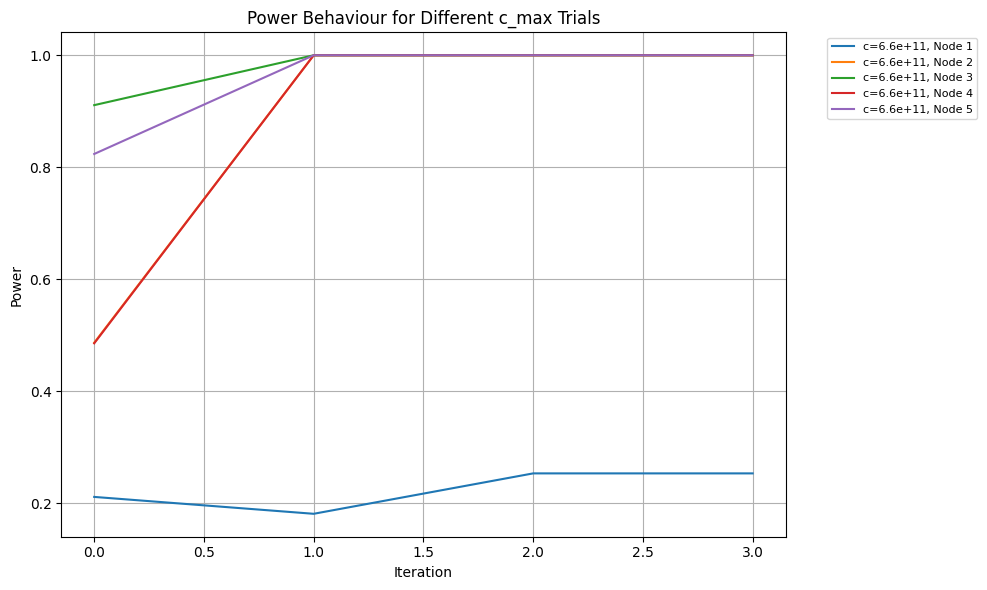

{np.float64(658645904815.724): array([[2.17029719e-13, 1.92827684e-13, 1.54033483e-13, 6.32374920e-14,
        4.46163057e-14],
       [2.62725993e-13, 2.63602239e-13, 1.84664586e-13, 9.98198790e-14,
        5.55547909e-14],
       [2.92743243e-13, 2.86205804e-13, 1.97820038e-13, 1.06436328e-13,
        5.91422726e-14],
       [2.92743243e-13, 2.86205804e-13, 1.97820038e-13, 1.06436328e-13,
        5.91422726e-14]])}
{np.float64(658645904815.724): array([[0.21166286, 0.48685753, 0.91094882, 0.48580603, 0.82379842],
       [0.1815254 , 1.        , 1.        , 1.        , 1.        ],
       [0.25365449, 1.        , 1.        , 1.        , 1.        ],
       [0.25365449, 1.        , 1.        , 1.        , 1.        ]])}


In [2]:
# =================== Best Response Algorithm ===================
def utility_vector(P, h, c_max, eta):
    utilities = np.zeros(len(P))
    P = np.asarray(P)
    for n in range(len(P)):
        gain_term = (h[n] * np.sqrt(P[n]) / np.sqrt(eta)) * \
                    np.sum([np.sqrt(P[m]) * h[m] / np.sqrt(eta) for m in range(len(P)) if m != n])
        penalty_term = (c_max * h[n]**2 * P[n] / eta) * \
                       np.sum([P[m] * h[m]**2 / eta for m in range(len(P))])
        utilities[n] = gain_term - penalty_term
    return utilities

def closed_form_p_star(P, h, c_max, eta, P_max_vec):
    optimal_power = []
    sqrtP = np.sqrt(P)
    h2 = h ** 2
    for i in range(len(P)):
        mult = eta / (2 * c_max * h[i])
        sum1 = np.sum(h[j] * sqrtP[j] for j in range(len(P)) if i != j)
        sum2 = np.sum(h2[j] * P[j] for j in range(len(P)) if i != j) + 1e-12
        base = mult * (sum1 / sum2)
        P_star = np.clip(base ** 2, 1e-10, P_max_vec[i])  # clipping
        optimal_power.append(P_star)
    return np.array(optimal_power)
# =================== Modified adaptive_best_response ===================
def adaptive_best_response(P, h, eta, epsilon, max_iteration=1000, P_max=1.0):
    h1, h2 = np.sort(h)[-2:]
    c_max = eta / (4 * h1 * h2)
    print("Starting c_max:", c_max)

    P_max_vec = np.ones(len(P)) * P_max
    factor = 2.0
    found = False
    history_util = {}
    history_power = {}

    while not found and c_max < 1e15:

        print(f"\n=== Testing c_max = {c_max:.3e} ===")

        P_current = P.copy()
        utility_history = [utility_vector(P_current, h, c_max, eta)]
        power_history = [P_current.copy()]
        convergence = 0
        iteration = 0
        stop_due_to_negative = False

        while convergence == 0:
            print(iteration)
            iteration += 1
            P_new = closed_form_p_star(P_current, h, c_max, eta, P_max_vec)
            utilities_new = utility_vector(P_new, h, c_max, eta)
            utility_history.append(utilities_new.copy())
            power_history.append(P_new.copy())

            if np.any(utilities_new < 0):
                print(f"⚠ Negative utility at iteration {iteration}, increasing c_max...")
                stop_due_to_negative = True
                break

            if np.linalg.norm(P_new - P_current) < epsilon or iteration == max_iteration:
                convergence = 1
            else:
                P_current = P_new

        history_util[c_max] = np.array(utility_history)
        history_power[c_max] = np.array(power_history)

        if not stop_due_to_negative:
            found = True
            print(f"✅ Found feasible c_max = {c_max:.3e}, converged in {iteration} iterations.")
            df = pd.DataFrame({
                "Node": np.arange(1, len(P) + 1),
                "Final Power P*": P_new,
                "Final Utility": utilities_new,
                "Channel Gain h": h
            })
            print(df)
            return c_max, history_util, history_power, df

        c_max *= factor

    print("Could not find a feasible c_max up to 1e15")
    return None, history_util, history_power, None

# =================== Example Usage ===================
eta = 1
epsilon = 1e-2
N = 5
max_iteration = 100
P = np.random.uniform(0.1, 1, N)  # random initial power
receiver_coordinates = (0, 0, 0)
transmitter_coordinates = [
    (7.5, 3.0, 2.25),
    (12.0, 6.0, 3.0),
    (16.5, 8.25, 3.75),
    (21.0, 10.5, 4.5),
    (25.5, 12.0, 5.25)
]
h = np.array([get_channel_gain(tx, receiver_coordinates, 2405e6) for tx in transmitter_coordinates])

print("Channel gain values are:", h)
print("Initial Power values are:", P)

c_star, utility_histories, power_histories, df = adaptive_best_response(
    P, h, eta, epsilon, max_iteration, P_max=1.0 #can change the p_max here
)

# ----- Plot Utility Behaviour -----
plt.figure(figsize=(10, 6))
for c_val, history in utility_histories.items():
    iterations = np.arange(history.shape[0])
    for node in range(history.shape[1]):
        plt.plot(iterations, history[:, node], label=f"c={c_val:.1e}, Node {node+1}")
plt.xlabel("Iteration")
plt.ylabel("Utility")
plt.title("Utility Behaviour for Different c_max Trials")
plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- Plot Power Behaviour -----
plt.figure(figsize=(10, 6))
for c_val, history in power_histories.items():
    iterations = np.arange(history.shape[0])
    for node in range(history.shape[1]):
        plt.plot(iterations, history[:, node], label=f"c={c_val:.1e}, Node {node+1}")
plt.xlabel("Iteration")
plt.ylabel("Power")
plt.title("Power Behaviour for Different c_max Trials")
plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

print(utility_histories)
print(power_histories)